In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import ariel_load
import ariel_model
import copy
import tqdm
kgs.sanity_checks_active = True
kgs.sanity_checks_without_errors = True

local


In [2]:
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

(1099, 1)

In [3]:
loaders = ariel_load.default_loaders()
loaders[0].cache_steps = []
loaders[1].apply_full_sensor_corrections.inpainting_wavelength = False
loaders[1].apply_pixel_corrections.mask_hot = False
loaders[1].apply_full_sensor_corrections.use_pca_for_background_removal = False
loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = False
loaders[1].apply_full_sensor_corrections.remove_background_remove_used_rows = False
loaders[1].apply_wavelength_binning = ariel_load.ApplyWavelengthBinningAIRS2()
loaders[1].apply_wavelength_binning.make_diagnostic_plots = False
loaders[1].apply_wavelength_binning.residual_threshold = np.inf
for d in tqdm.tqdm(train_data+test_data):
    dd = copy.deepcopy(d)
    for t in dd.transits:
        t.load_to_step(5,dd,loaders)
    #kgs.print_sanity_checks()
# model = ariel_model.baseline_model()
# data = train_data
# model.train(data)
# inferred_data = model.infer(data)
# kgs.score_metric(inferred_data, data)

100%|█████████████████████████████████████████████████████████████████████████████| 1100/1100 [1:39:29<00:00,  5.43s/it]


In [4]:
kgs.print_sanity_checks()

n_transits [1.0, 2.0] [1, 2] 1
gain [0.4369, 0.4369] [0.4, 0.5] 1
offset [-1000.0, -1000.0] [-1001, -999] 2
ratio_hot [0.0, 0.0107421875] [0, 0.018] 3
ratio_dead [0.0013297872340425532, 0.0029296875] [0, 0.012] 4
linear_corr_impact [3689.96146487254, 30443.11870272854] [0, 50000] 9
dark_min [-0.023858622298016365, 0.002066195137730647] [-0.01, 0.01] 5
dark_max [0.01163899428117778, 11.91650836308298] [0.005, 0.02] 6
flat_min [0.8617695468230018, 0.9478742031905644] [0.5, 1.05] 7
flat_max [1.0383349568133693, 1.0837272656512849] [0.95, 1.2] 8
cosmic_ray_removal [0.0, 1.1623325453112688e-06] [0, 5e-06] 10
noise_est_min [6.987861343779192, 9.653010317592997] [6, 12] 8
residual_cov_rms [0.00044250049955078395, 0.014859052543641353] [0, 0.02] 1
residual_cov_max [0.0030056021841318474, 0.1572319402168809] [0, 0.2] 2
noise_est_ratio [0.4427679528325196, 0.7040450440594053] [0.4, 0.9] 3
residual_std_ratio [0.050455053943670114, 0.1088399750172484] [0.03, 0.15] 4
residual_mean_ratio [2.12696136

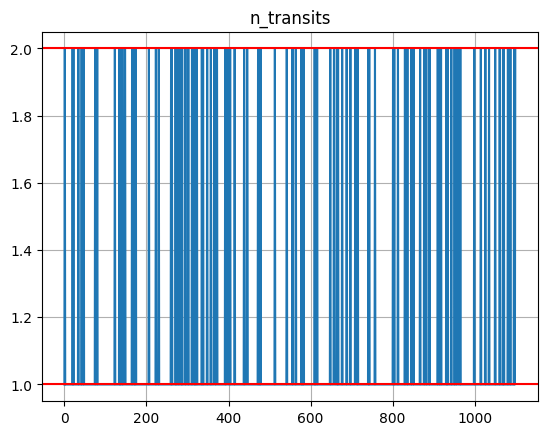

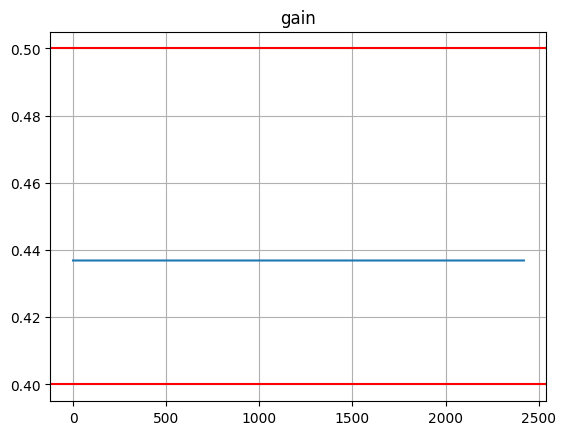

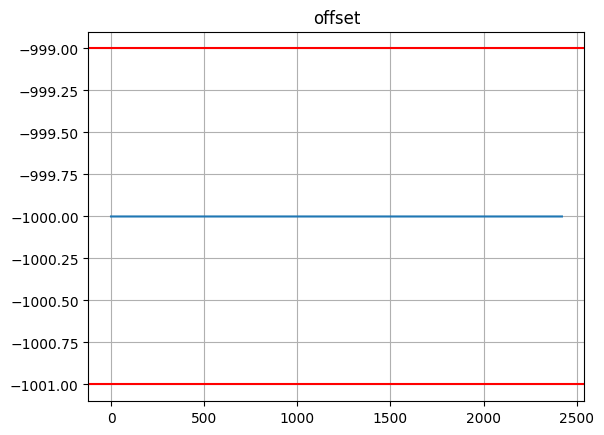

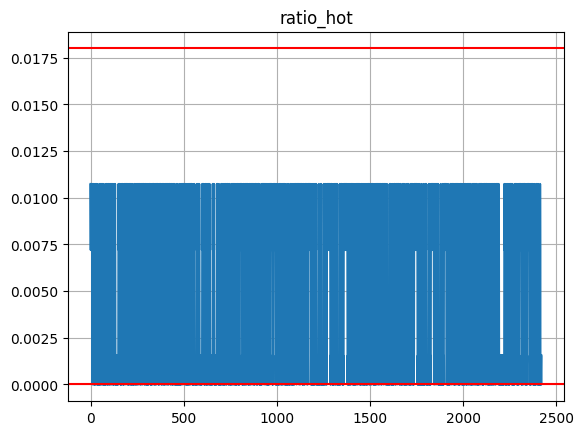

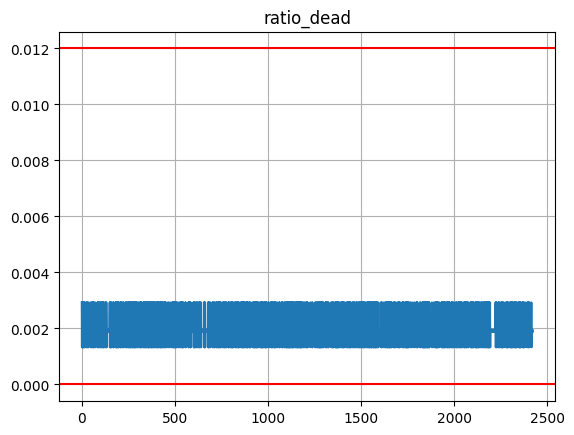

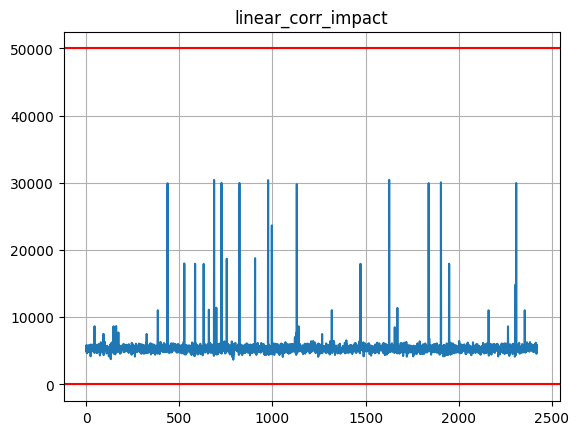

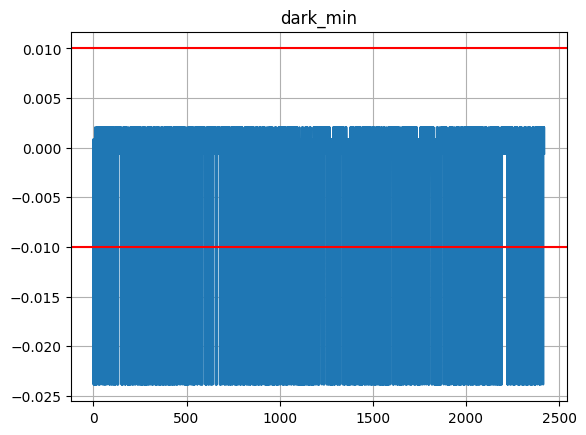

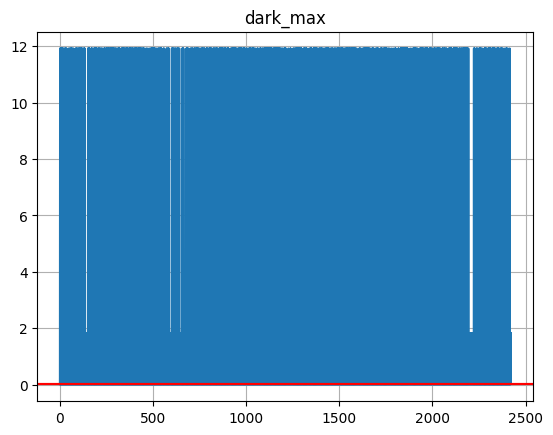

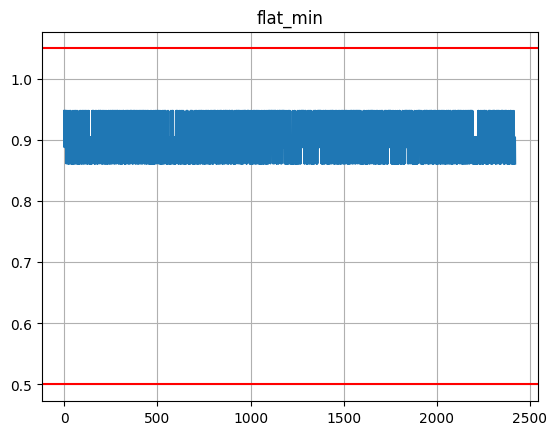

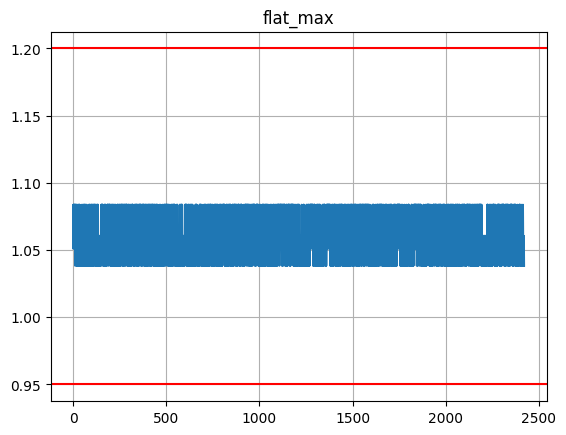

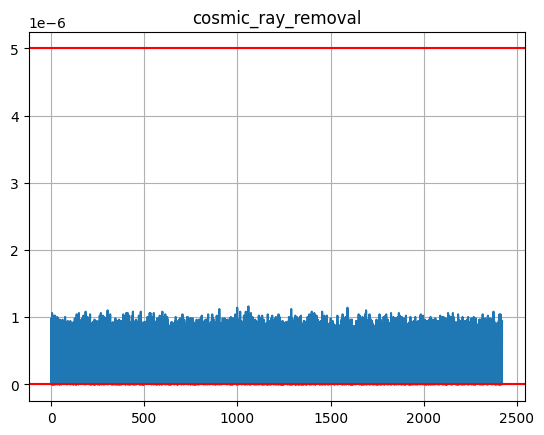

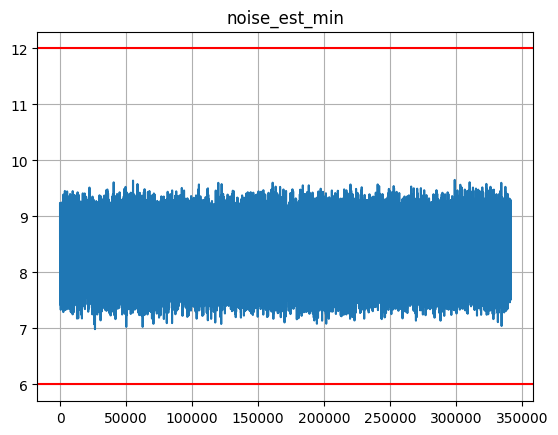

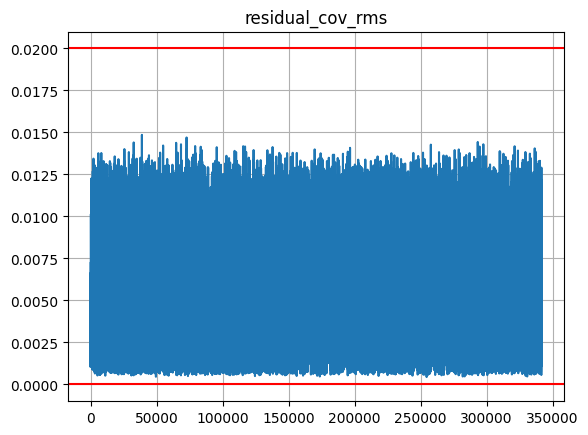

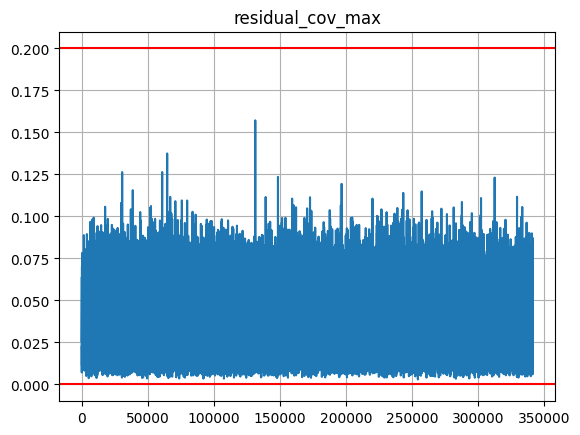

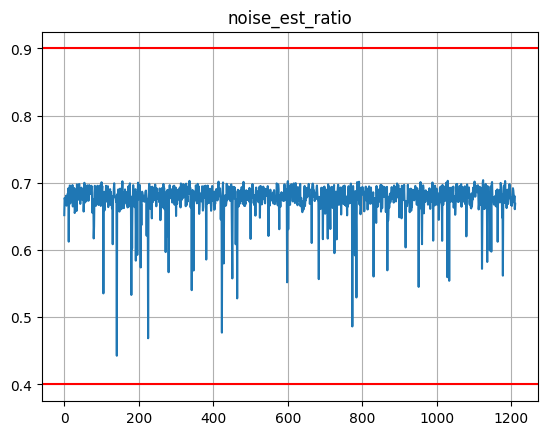

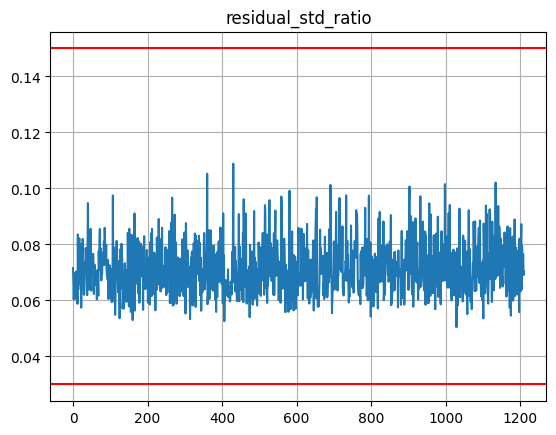

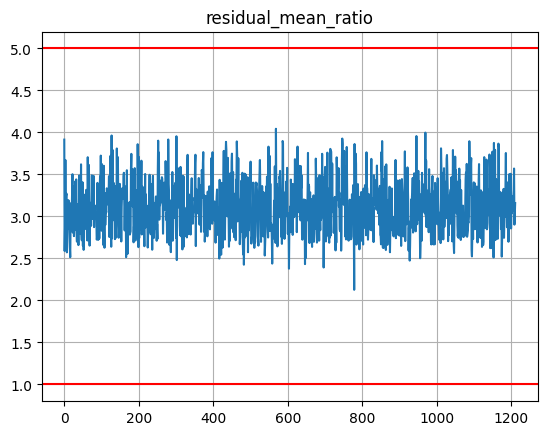

In [5]:
kgs.plot_sanity_checks()

In [6]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.
